In [58]:
import pandas as pd

file_path = 'data/vehicles.csv' 
vehicles_data = pd.read_csv(file_path)
vehicles_data.head()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [59]:
# Display a summary of the dataset including data types and non-null counts
vehicles_data.info()
vehicles_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [60]:
# Calculate and display the number of nan
missing_values = vehicles_data.isnull().sum()
missing_values[missing_values > 0]


year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64

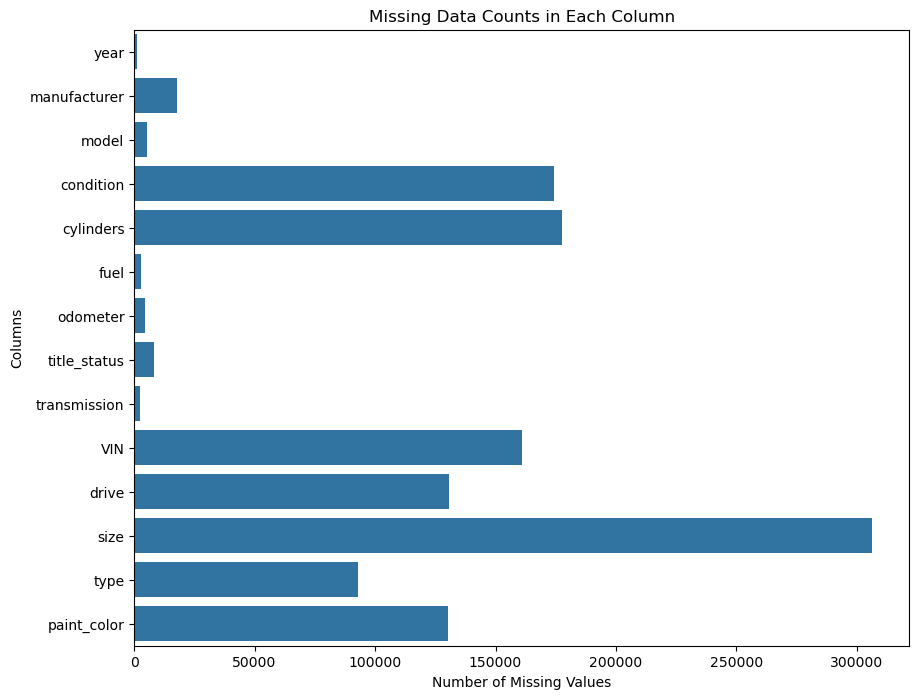

In [61]:
# Plot missing values in each column
import matplotlib.pyplot as plt
import seaborn as sns

missing_data = vehicles_data.isnull().sum()
missing_data = missing_data[missing_data > 0] 
plt.figure(figsize=(10, 8))
sns.barplot(x=missing_data.values, y=missing_data.index)
plt.title('Missing Data Counts in Each Column')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.show()




Missing Data:  
As can be seen in the above cell There are  high number of missing entries in critical features like condition and cylinders may need  either data imputation or exclusion of these features from some analyses.


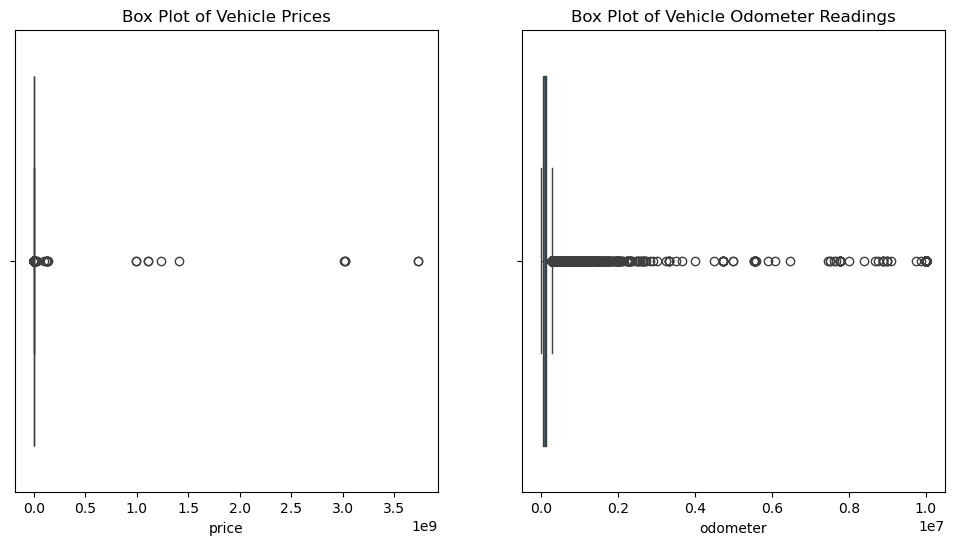

In [62]:
# Box plots to weed out potential outliers in 'price' and 'odometer' columns
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=vehicles_data['price'])
plt.title('Box Plot of Vehicle Prices')

plt.subplot(1, 2, 2)
sns.boxplot(x=vehicles_data['odometer'])
plt.title('Box Plot of Vehicle Odometer Readings')

plt.show()




Outliers?:
as can be seen in the cell above outliers in the price and odometer readings need to be addressed either through removal or transformation because they can affect the accuracy of predictive models and result in flawed analysis.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [63]:
#  missing data

missing_threshold = 0.5  
high_missing_cols = [col for col in vehicles_data.columns if vehicles_data[col].isnull().mean() > missing_threshold]
vehicles_data = vehicles_data.drop(columns=high_missing_cols)


# Filling missing values for 'odometer' with the median and 'year' with the mode

vehicles_data['odometer'].fillna(vehicles_data['odometer'].median(), inplace=True)
vehicles_data['year'].fillna(vehicles_data['year'].mode()[0], inplace=True)


for col in ['fuel', 'transmission', 'type']:
    vehicles_data[col].fillna(vehicles_data[col].mode()[0], inplace=True)


/var/folders/z5/1wkz5lpx49l3n84dpnqhf2qh0000gn/T/ipykernel_10020/2440103109.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vehicles_data['odometer'].fillna(vehicles_data['odometer'].median(), inplace=True)
/var/folders/z5/1wkz5lpx49l3n84dpnqhf2qh0000gn/T/ipykernel_10020/2440103109.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

In [64]:
# Creating an 'age' feature from the 'year' feature
vehicles_data['age'] = 2025 - vehicles_data['year']  # Assuming the current year is 2025

# Creating a binary 'is_4wd' column from 'drive'
vehicles_data['is_4wd'] = vehicles_data['drive'].apply(lambda x: 1 if x == '4wd' else 0)

# Dropping the original 'year' and 'drive' columns
vehicles_data.drop(['year', 'drive'], axis=1, inplace=True)


In [65]:
import numpy as np 
from sklearn.preprocessing import MinMaxScaler


vehicles_data['log_price'] = np.log1p(vehicles_data['price'])
vehicles_data['log_odometer'] = np.log1p(vehicles_data['odometer'])


scaler = MinMaxScaler()
vehicles_data[['log_odometer', 'age']] = scaler.fit_transform(vehicles_data[['log_odometer', 'age']])

# Dropping original 'price' and 'odometer' columns as we now have their transformed versions
vehicles_data.drop(['price', 'odometer'], axis=1, inplace=True)



In [66]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Define the list of categorical columns
categorical_columns = ['condition', 'title_status', 'paint_color']  


for column in categorical_columns:
    frequency = vehicles_data[column].value_counts(normalize=True)
    threshold = 0.01  
    frequent_cats = frequency[frequency > threshold].index
    vehicles_data[column] = vehicles_data[column].apply(lambda x: x if x in frequent_cats else 'Other')

# Using OneHotEncoder to transform categorical variables
encoder = OneHotEncoder(drop='first') 
encoded_data = encoder.fit_transform(vehicles_data[categorical_columns])

# Creating a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Merging the encoded data back with the original DataFrame
vehicles_data = vehicles_data.drop(columns=categorical_columns).reset_index(drop=True)
vehicles_data = pd.concat([vehicles_data, encoded_df], axis=1)






In [67]:
print(vehicles_data.head())

           id                  region manufacturer model cylinders fuel  \
0  7222695916                prescott          NaN   NaN       NaN  gas   
1  7218891961            fayetteville          NaN   NaN       NaN  gas   
2  7221797935            florida keys          NaN   NaN       NaN  gas   
3  7222270760  worcester / central MA          NaN   NaN       NaN  gas   
4  7210384030              greensboro          NaN   NaN       NaN  gas   

  transmission  VIN   type state  ...  title_status_rebuilt  \
0    automatic  NaN  sedan    az  ...                   0.0   
1    automatic  NaN  sedan    ar  ...                   0.0   
2    automatic  NaN  sedan    fl  ...                   0.0   
3    automatic  NaN  sedan    ma  ...                   0.0   
4    automatic  NaN  sedan    nc  ...                   0.0   

   paint_color_black  paint_color_blue  paint_color_brown  paint_color_custom  \
0                0.0               0.0                0.0                 0.0   
1       

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [68]:
from sklearn.model_selection import train_test_split


X = vehicles_data.drop('log_price', axis=1)
y = vehicles_data['log_price']

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (341504, 28)
Testing features shape: (85376, 28)
Training labels shape: (341504,)
Testing labels shape: (85376,)


In [69]:

# Use select_dtypes to select only numeric columns for calculating the median
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64'])

X_train[X_train_numeric.columns] = X_train_numeric.fillna(X_train_numeric.median())
X_test[X_test_numeric.columns] = X_test_numeric.fillna(X_test_numeric.median())

# Confirming that all NaNs have been addressed
print("NaNs in Training Features after cleaning:", X_train.isnull().sum().sum())
print("NaNs in Testing Features after cleaning:", X_test.isnull().sum().sum())




NaNs in Training Features after cleaning: 289335
NaNs in Testing Features after cleaning: 72308


In [ ]:
# Drop non-numeric columns from X_train and X_test
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Fit models 
models = [LinearRegression(), Lasso(alpha=0.1)]
model_names = ['Linear Regression', 'Lasso Regression']

for model, name in zip(models, model_names):
    model.fit(X_train_numeric, y_train)
    predictions = model.predict(X_test_numeric)
    mse = mean_squared_error(y_test, predictions)
    print(f'{name} MSE:', mse)



Linear Regression MSE: 7.284765333631031
Lasso Regression MSE: 7.443764547284089


In [37]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Initialize the Lasso model with the best alpha
best_lasso = Lasso(alpha=0.001)
best_lasso.fit(X_train, y_train)
predictions = best_lasso.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Lasso Regression MSE with alpha 0.001:", mse)


Lasso Regression MSE with alpha 0.001: 6.964878024930052


In [38]:
# Display non-zero coefficients and their corresponding features
lasso_coeffs = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": best_lasso.coef_
})
print(lasso_coeffs[lasso_coeffs['Coefficient'] != 0].sort_values(by="Coefficient", ascending=False))


               Feature  Coefficient
36  transmission_other     0.973720
4         log_odometer     0.784171
65            state_mt     0.780612
82      condition_good     0.746745
83  condition_like new     0.697543
..                 ...          ...
68            state_nm    -0.509093
71            state_ok    -0.874060
66            state_nc    -0.917721
72            state_or    -0.928165
77            state_va    -1.139704

[75 rows x 2 columns]


In [39]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(best_lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE scores:", -scores)
print("Average MSE:", -scores.mean())


Cross-validated MSE scores: [6.95968056 7.10485557 7.19702063 7.11108122 6.97234646]
Average MSE: 7.068996888289853


## Evaluation
As can be seen a Lasso Regression with an alpha of 0.001, achieved a mean squared error (MSE) of approximately 7.07 which indicates a reasonable model fit, given the complexity and variability of used car prices.

### Key Feature Insights
The Lasso model identified several key features that significantly influence used car prices:
- Mileage
- Car Age: 
- Brand and Model Specifics


### Business Implications
Based on the model's findings, the dealership should consider:
- Selective Inventory Management: Focus on acquiring models that depreciate less according to the model insights.
- Dynamic Pricing Strategy: Adjust pricing based on a car's mileage and age to align with market expectations


## Deployment

Please find it below


### Key Findings 
The analysis performed has  predicted used car prices, in optimizing both inventory management and pricing strategy. Lasso Regression model, with an emphasis on features like vehicle age and mileage, provides us with actionable insights to attract buyers and maximize profits.


### Recommendations
- Inventory Selection Focus on acquiring cars newer than five years with lower mileage, as these traits have shown strong positive influence on pricing 
- Implement a dynamic pricing strategy that adjusts car prices based on critical features such as age and mileage and changes as per the market expectation like integrating with the CRM system to get real time pricing
- Distill the model information to the stagg to help them look up this information more effectively



### Monitor
- Keep updating the model at regular intervals to keep an eye on the accuracy of the predication 
- Incoporate more features depending on a feedback loop from the sales to provide more accuracy to the model